In [1]:
from geoimages import etl
from geoimages import cluster
from geoimages import visualize

Using TensorFlow backend.


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Load data for K-Means optimization.

In [3]:
images_etl = etl.Images()
images_etl.images_meta_data = images_etl.read_json('../datasets/similarity_meta_data.json')
img_vectors = images_etl.images_to_vectors_df()

In [4]:
print('Number of files: ' + str(len(images_etl.images_meta_data['images'].keys())))
print('Number of non 28x28x3 files: ' + str(len(images_etl.images_meta_data['errata'])))
print('Image vector size: ' + str(img_vectors.shape[1]))

Number of files: 119876
Number of non 28x28x3 files: 0
Image vector size: 2352


### Optimize K-Means Model Number of Clusters

In [5]:
model_kmeans_dev = cluster.KMeansModel()
model_kmeans_dev.fit(img_vectors)

In [6]:
inertias_dev = model_kmeans_dev.model_inertias([1,2,3,4,5,6,7,8,9,10])

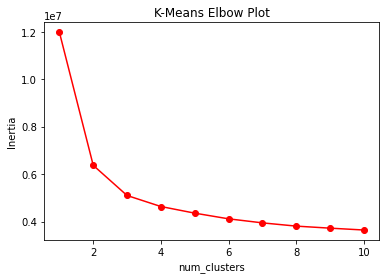

In [7]:
viz = visualize.Plots()
viz.elbow_plot([1,2,3,4,5,6,7,8,9,10],inertias_dev)